# Outlier Detection with PyOD

In [3]:
# !pip install --upgrade pyod
from pyod.models.knn import KNN
from pyod.utils.data import generate_data
from pyod.utils.example import visualize

## Outlier Detection: People Heights

Suppose we have a dataset containing information about the heights of people in a population, and we want to detect potential outliers that might indicate measurement errors or exceptionally tall or short individuals.

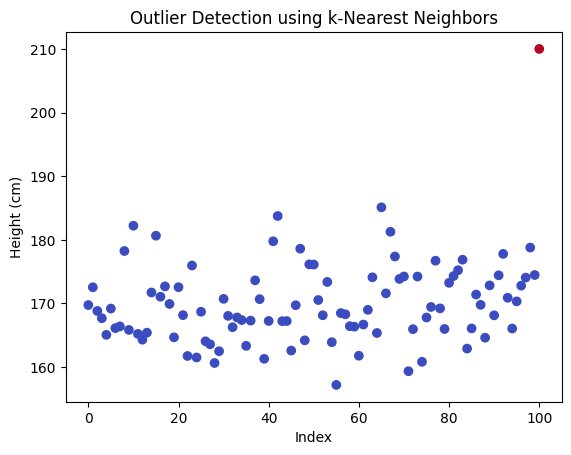

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data with one outlier
data = np.random.normal(170, 5, size=(100, 1))
data = np.append(data, [[210]], axis=0)

# Fit a k-Nearest Neighbors outlier detector
knn = KNN(n_neighbors=5, contamination=0.01)
knn.fit(data)

# Predict the outliers
outlier_predictions = knn.predict(data)

# Plot the data and the detected outlier
plt.scatter(range(len(data)), data, c=outlier_predictions, cmap=plt.cm.coolwarm)
plt.xlabel('Index')
plt.ylabel('Height (cm)')
plt.title('Outlier Detection using k-Nearest Neighbors')
plt.show()

In the above example, we generate a sample dataset containing the heights of people in a population, with one exceptionally tall individual (210 cm). We use the K-Nearest Neighbors (KNN) outlier detection method from the PyOD package to detect the outlier. The plot shows the data points with their indices, and the detected outlier is highlighted in a different color.

## Outlier Detection: Synthetic Data

In [5]:
# Generate sample data

contamination = 0.1  # percentage of outliers
n_train = 200  # number of training points
n_test = 100  # number of testing points

X_train, X_test, y_train, y_test = generate_data(
    n_train=n_train, n_test=n_test, contamination=contamination)

In [6]:
# train kNN detector
clf_name = 'KNN'
clf = KNN()
clf.fit(X_train)

# get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(X_test)  # outlier scores

# it is possible to get the prediction confidence as well
y_test_pred, y_test_pred_confidence = clf.predict(X_test, return_confidence=True)  # outlier labels (0 or 1) and confidence in the range of [0,1]

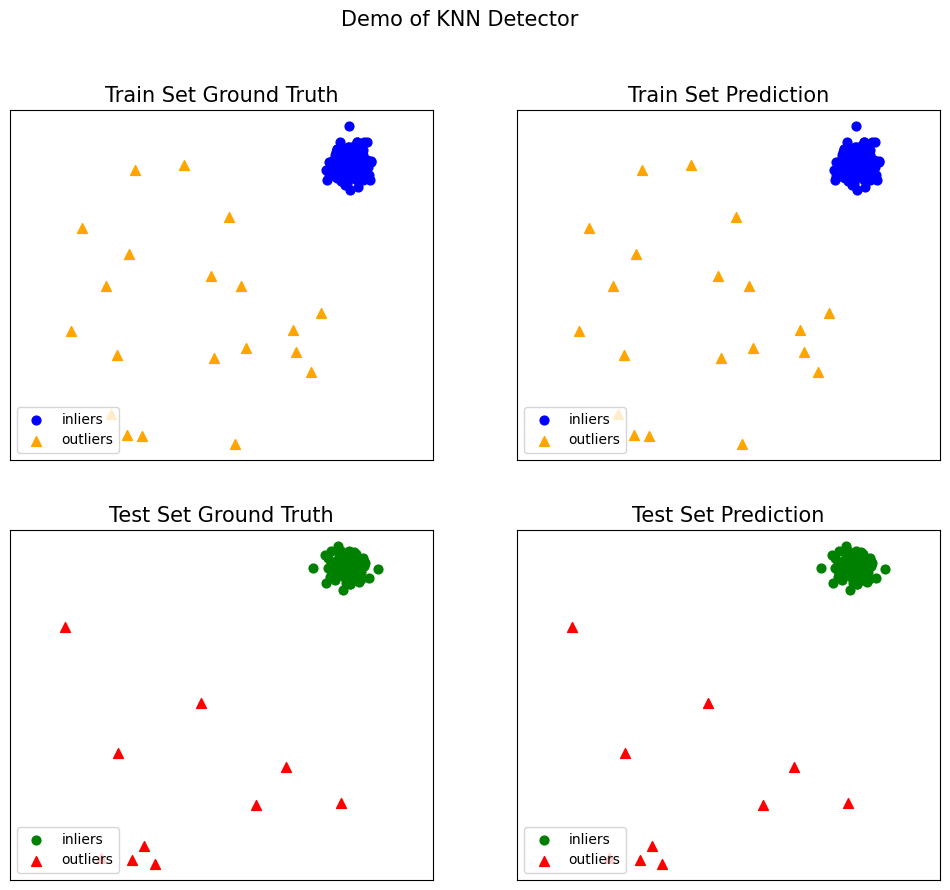

In [7]:
visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred,
          y_test_pred, show_figure=True, save_figure=False)

## Your Tasks

Try out different algorithms (Isolation Forest and LOF) for the above outlier detection problems (body heights and synthetic data). Are there any differences compared to KNN? Please do some analysis.

Don't forget to put your name and student ID.

**Name:** Ardian

**Student ID:** 2106638173

Make sure you type down your solutions below.

In [30]:
from sklearn.ensemble import IsolationForest

IF = IsolationForest(n_estimators=100, contamination=contamination, max_features=2)
IF.fit(X_train)

IF_y_train_pred = IF.predict(X_train)
IF_y_test_pred = IF.predict(X_test)

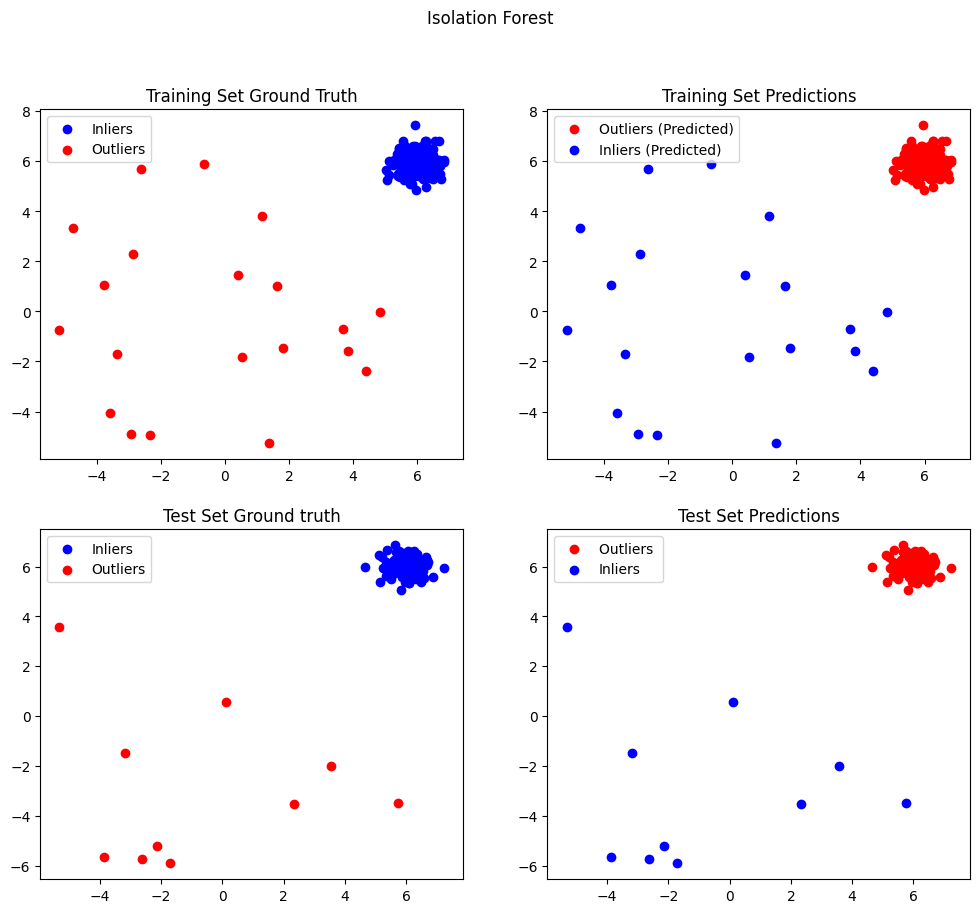

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
plt.suptitle('Isolation Forest')

plt.subplot(2, 2, 1)
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], c='blue', marker='o', label='Inliers')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], c='red', marker='o', label='Outliers')
plt.title('Training Set Ground Truth')
plt.legend()

plt.subplot(2, 2, 2)
plt.scatter(X_train[IF_y_train_pred == 1][:, 0], X_train[IF_y_train_pred == 1][:, 1], c='red', marker='o', label='Outliers (Predicted)')
plt.scatter(X_train[IF_y_train_pred == -1][:, 0], X_train[IF_y_train_pred == -1][:, 1], c='blue', marker='o', label='Inliers (Predicted)')
plt.title('Training Set Predictions')
plt.legend()

plt.subplot(2, 2, 3)
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], c='blue', marker='o', label='Inliers')
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], c='red', marker='o', label='Outliers')
plt.title('Test Set Ground truth')
plt.legend()

plt.subplot(2, 2, 4)
plt.scatter(X_test[IF_y_test_pred == 1][:, 0], X_test[IF_y_test_pred == 1][:, 1], c='red', marker='o', label='Outliers ')
plt.scatter(X_test[IF_y_test_pred == -1][:, 0], X_test[IF_y_test_pred == -1][:, 1], c='blue', marker='o', label='Inliers')
plt.title('Test Set Predictions')
plt.legend()

plt.show()

References:
- https://pyod.readthedocs.io/en/latest/example.html
- https://saturncloud.io/glossary/outlier-detection/